In [1]:
#load the images from a folder and sort them by color

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

#load the images from a folder
def load_images_from_folder(folder,count):
    images = []
    i = 0
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            #downsample the image
            img = cv2.resize(img, (64,64), fx=0.1, fy=0.1)

            images.append(img)
            i = i + 1
            if i == count:  #limit the number of images
                break
    return images

image_set = load_images_from_folder("data/taj_jw/jpg_files/preprocessed/RGB",100)
len(image_set)


97

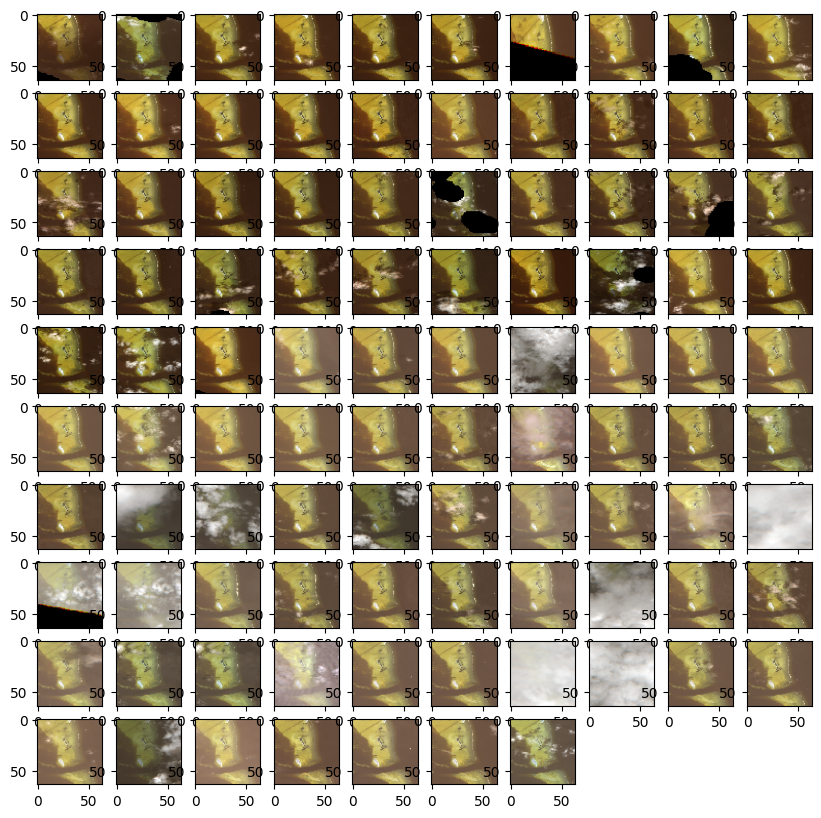

In [2]:
#display images in a grid of 10x10
def display_images(images):
    fig = plt.figure(figsize=(10,10))
    for i in range(1,98):
        ax = fig.add_subplot(10,10,i)
        ax.imshow(images[i-1])
    plt.show()

display_images(image_set)

In [3]:
imarray = np.array(image_set)
#flatten the images
imarray = imarray.reshape(imarray.shape[0],-1)
imarray.shape

(97, 12288)

In [4]:
#1d embedding
embedding = TSNE(n_components=1, perplexity=20, verbose=1,n_iter=1000,init="pca").fit_transform(imarray)

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 97 samples in 0.002s...
[t-SNE] Computed neighbors for 97 samples in 0.284s...
[t-SNE] Computed conditional probabilities for sample 97 / 97
[t-SNE] Mean sigma: 1120.378382
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.158409
[t-SNE] KL divergence after 700 iterations: 0.293561


In [5]:
#convert to a list for sorting
embed_list = embedding.tolist()
print(len(embed_list),len(image_set))

97 97


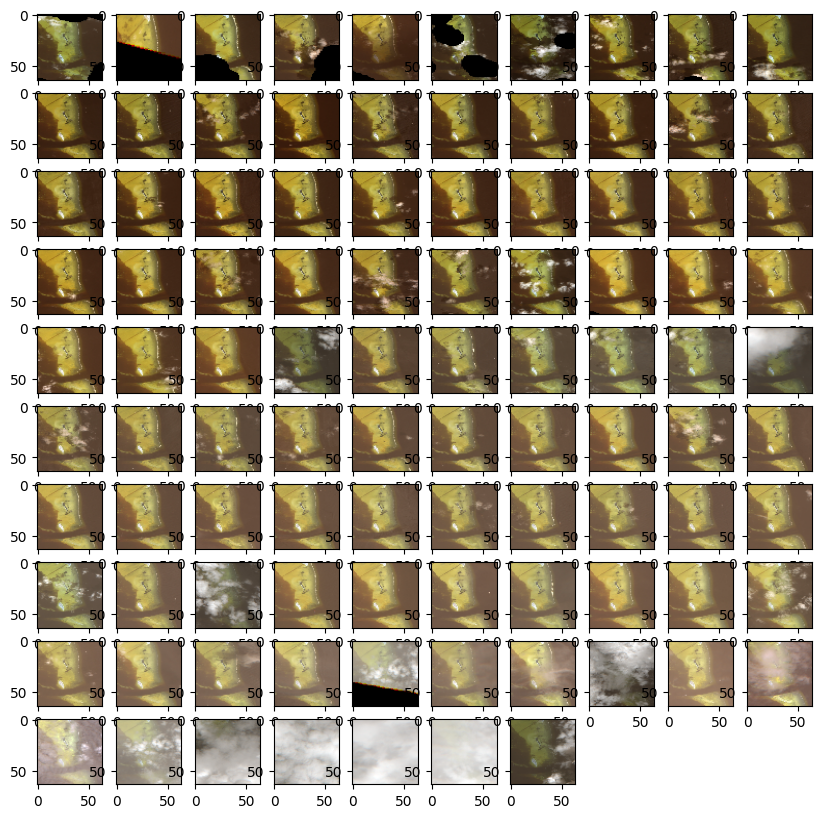

In [6]:
#sort list of images with list of embeddings
def sort_images(images,keys): 
    sorted_images = []
    for i in range(len(keys)):
        min_index = np.argmin(keys)
        sorted_images.append(images[min_index])
        images.pop(min_index)
        keys.pop(min_index)
    return sorted_images

#sorting, but using a copy so the pop() doesn't affect the original list
sorted_images = sort_images(image_set.copy(),embed_list)
display_images(sorted_images)